# Generic square lattice reactor thorium breeder reactor

In [1]:
# !/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Fri Aug  2 07:02:55 2019

@author: SindreKaald
"""

import openmc
import openmc.deplete
import numpy as np
import matplotlib.pyplot as plt

from os import listdir
from os.path import isfile, join

# Material definition
Define your materials which will be used in the simulation

In [2]:

###############################################################################
#                              Define materials
###############################################################################

# Fuel material setting
fuel_material = openmc.Material(1, name='Thorium fuel')
fuel_material.set_density('g/cm3', 10.062)
fuel_material.add_nuclide("Th232", 94)
fuel_material.add_nuclide("U235", 5)
fuel_material.add_nuclide("U238", 0.33)
fuel_material.add_nuclide("Xe135", 0.001)
fuel_material.add_nuclide("O16", 0.33)
fuel_material.depletable = True

# Fuel material setting
uo2_2 = openmc.Material(material_id=101, name='2nd Discretization, UO2 fuel at 2.4% wt enrichment')
uo2_2.set_density('g/cm3', 10.29769)
uo2_2.add_element('U', 1., enrichment=2.45)
uo2_2.add_element('O', 2.)
uo2_2.depletable = True

# Fuel gap material setting ----------
helium = openmc.Material(material_id=2, name='Helium for gap')
helium.set_density('g/cm3', 0.001598)
helium.add_element('He', 2.4044e-4)

# Fuel cladding material setting ---------
clad = openmc.Material(material_id=3, name='Zircaloy 4')
clad.set_density('g/cm3', 6.55)
clad.add_element('Sn', 0.014  , 'wo')
clad.add_element('Fe', 0.00165, 'wo')
clad.add_element('Cr', 0.001  , 'wo')
clad.add_element('Zr', 0.98335, 'wo')

# Moderator material setting ----------
borated_water = openmc.Material(material_id=4, name='Borated water')
borated_water.set_density('g/cm3', 0.740582)
borated_water.add_element('B', 4.0e-5)
borated_water.add_element('H', 5.0e-2)
borated_water.add_element('O', 2.4e-2)
borated_water.add_s_alpha_beta('c_H_in_H2O')

# Cold water  
cold_water = openmc.Material(material_id=5, name='Cold borated water')
cold_water.set_density('atom/b-cm', 0.07416)
cold_water.add_nuclide("H1", 2.0)
cold_water.add_nuclide("O16", 1.0)
cold_water.add_nuclide("B10", 6.490e-4)
cold_water.add_nuclide("B11", 2.689e-3)
cold_water.add_s_alpha_beta('c_H_in_H2O')

# Hot water
hot_water = openmc.Material(material_id=6, name='Hot borated water')
hot_water.set_density('atom/b-cm', 0.06614)
hot_water.add_nuclide("H1", 2.0)
hot_water.add_nuclide("O16", 1.0)
hot_water.add_nuclide("B10", 6.490e-4)
hot_water.add_nuclide("B11", 2.689e-3)
hot_water.add_s_alpha_beta('c_H_in_H2O')

# Alternative moderator
heavy_water = openmc.Material(material_id=7,name='heavy water')
heavy_water.add_nuclide('H2', 2.0)
heavy_water.add_nuclide('O16', 1.0)
heavy_water.add_s_alpha_beta('c_D_in_D2O')
heavy_water.set_density('g/cm3', 1.1)

# Reactor shielding material
shielding = openmc.Material(material_id=8, name='Bottom plate region')
shielding.set_density('g/cm3', 7.184)
shielding.add_nuclide("H1", 0.0011505, 'wo')
shielding.add_nuclide("O16", 0.0091296, 'wo')
shielding.add_nuclide("B10", 3.70915e-6, 'wo')
shielding.add_nuclide("B11", 1.68974e-5, 'wo')
shielding.add_nuclide("Fe54", 0.03855611055, 'wo')
shielding.add_nuclide("Fe56", 0.627585036425, 'wo')
shielding.add_nuclide("Fe57", 0.014750478, 'wo')
shielding.add_nuclide("Fe58", 0.002000875025, 'wo')
shielding.add_nuclide("Ni58", 0.059855207342, 'wo')
shielding.add_nuclide("Mn55", 0.0197940, 'wo')
shielding.add_nuclide("Cr52", 0.157390026871, 'wo')
shielding.add_s_alpha_beta('c_H_in_H2O')

# Reactor pressure vessel material
steel = openmc.Material(material_id=9, name='Reactor pressure vessel steel')
steel.set_density('g/cm3', 7.9)
steel.add_nuclide("Fe54", 0.05437098, 'wo')
steel.add_nuclide("Fe56", 0.88500663, 'wo')
steel.add_nuclide("Fe57", 0.0208008, 'wo')
steel.add_nuclide("Fe58", 0.00282159, 'wo')
steel.add_nuclide("Ni58", 0.0067198, 'wo')
steel.add_nuclide("Ni60", 0.0026776, 'wo')
steel.add_nuclide("Mn55", 0.01, 'wo')
steel.add_nuclide("Cr52", 0.002092475, 'wo')
steel.add_nuclide("C0", 0.0025, 'wo')
steel.add_nuclide("Cu63", 0.0013696, 'wo')

# Reference you cross sections .xml-file

In [3]:
materials_file = openmc.Materials([fuel_material, helium, clad, borated_water, cold_water,
                   hot_water,shielding,steel, heavy_water])

materials_file.cross_sections = "/Users/SindreKaald/nndc_hdf5/cross_sections.xml"

materials_file.export_to_xml()

# Create the geometry

In [4]:

###############################################################################
#                            Make the geometry
###############################################################################

# A square lattice reactor 
# Cylindrical tank 
# Reactor pitch = 
# Number of fuel elements = 

###############################################################################
#                            Create the necessary surfaces


# Surfaces for fuel elements
fuel_surf_1 = openmc.ZCylinder(r=0.41, surface_id=1)  # Cylinder for fuel pellets
fuel_surf_2 = openmc.ZCylinder(r=0.475, surface_id=2) # Fuel gap 
fuel_surf_3 = openmc.ZCylinder(r=0.56, surface_id=3)  # Cylinder for fuel cladding, inner radius
fuel_surf_4 = openmc.ZCylinder(r=0.62, surface_id=4)  # Cylinder for fuel cladding, outer radius

# Surfaces for reactor tank and shielding
core_surf_5 = openmc.ZCylinder(r=75.0, surface_id=5) # Reactor tank inner surface
core_surf_6 = openmc.ZCylinder(r=78.0, surface_id=6)# Reactor tank outer surface
core_surf_7 = openmc.ZCylinder(r=90.0, surface_id=7, boundary_type='vacuum') 
#core_surf_8 = openmc.ZCylinder(r=149.0, surface_id=8, boundary_type='vacuum') # Cylinder for simulation universe (and boundary to zero importance region)

#core_surf_31 = openmc.ZPlane(z0=-100.0, surface_id=31, boundary_type='vacuum') # Lower outside (and boundary to zero importance region)
core_surf_32 = openmc.ZPlane(z0=-90.0, surface_id=32, boundary_type='vacuum') # Shielding lower 
core_surf_33 = openmc.ZPlane(z0=-85.0, surface_id=33) # Lower tank wall outside
core_surf_34 = openmc.ZPlane(z0=-83.0, surface_id=34) # Lower tank wall inside
core_surf_35 = openmc.ZPlane(z0=0.0, surface_id=35)   # Middle of tank
core_surf_36 = openmc.ZPlane(z0=83.0, surface_id=36)  # Upper tank wall inside
core_surf_37 = openmc.ZPlane(z0=85.0, surface_id=37)  # Upper tank wall outside
core_surf_38 = openmc.ZPlane(z0=90.0, surface_id=38, boundary_type='vacuum')  # Shielding upper
#core_surf_39 = openmc.ZPlane(z0=100.0, surface_id=39, boundary_type='vacuum') # Upper outside (and boundary to zero importance region)


# Volume to material assignment

In [5]:
###############################################################################
#                     Create the volumes and fill with material

# Define pin cells.
fuel = openmc.Universe(name='Fuel pin, cladding',
                            universe_id=1)
fuel_cell_21 = openmc.Cell(cell_id=21, fill=fuel_material, region= - fuel_surf_1)
fuel_cell_22 = openmc.Cell(cell_id=22, fill=clad, region= + fuel_surf_1 & - fuel_surf_2)
fuel_cell_23 = openmc.Cell(cell_id=23, fill=heavy_water, region= + fuel_surf_2)
fuel.add_cells((fuel_cell_21, fuel_cell_22, fuel_cell_23))


tube_cold = openmc.Universe(name='Instrumentation guide tube, '
                            'cold water', universe_id=2)
c24 = openmc.Cell(cell_id=24, fill=borated_water, region=-fuel_surf_3)
c25 = openmc.Cell(cell_id=25, fill=clad, region=+fuel_surf_3 & -fuel_surf_4)
c26 = openmc.Cell(cell_id=26, fill=borated_water, region=+fuel_surf_4)
tube_cold.add_cells((c24, c25, c26))


# Define assemblies.
moderator_assembly = openmc.Universe(name='Water assembly', universe_id = 5)
c50 = openmc.Cell(cell_id=50, fill=borated_water, region= + core_surf_34 & -core_surf_36)
moderator_assembly.add_cell(c50)

# Set positions occupied by guide tubes
tube_x = np.array([0])
tube_y = np.array([0])


#         Define the fuel assembly 
#           10 by 10 fuel pins surrounded by water moderator
#          ---------------------
#         | o o o o o o o o o o |
#         | o o o o o o o o o o |
#         | o o o o o x o o x x |
#         | o o o x o o o o o o |
#         | o o o o o o o o o o |
#         | o o o o o o o o o o |
#         | o o o o o o o o o o |
#         | o o o o o o o o o o |
#         | o o o o o o o o o o |
#         | o o o o o o o o o o |
#         | o o o o o o o o o o |
#          ---------------------

fuel_lattice_101 = openmc.RectLattice(name="Fuel lattice, lattice_id=101")
fuel_lattice_101.lower_left = (-5, -5)
fuel_lattice_101.pitch = (1, 1)
fuel_lattice_101.universes = np.tile(fuel, (10, 10))
fuel_lattice_101.universes[tube_x, tube_y] = tube_cold

# Construct filling for the reactor core lattice 
fuel_assembly = openmc.Universe(name='Fuel assembly ', universe_id=6)
fuel_assembly_cell_60 = openmc.Cell(cell_id=60, fill = fuel_lattice_101 , region= + core_surf_34 & -core_surf_36)
fuel_assembly.add_cell(fuel_assembly_cell_60)

fa_hw = openmc.Universe(name='Water assembly', universe_id=8)
c70 = openmc.Cell(cell_id=70, fill=hot_water, region= + core_surf_34 & -core_surf_36)
fa_hw.add_cell(c70)

core_lattice = openmc.RectLattice(name='Core lattice', lattice_id=200)
core_lattice.lower_left = (-80.0, -80.0)
core_lattice.pitch = (10, 10)
core_lattice.universes = [
    [fa_hw]*16,
    [fa_hw]*5 + [fuel_assembly]*6 + [fa_hw]*5,
    [fa_hw]*4 + [fuel_assembly]*8 + [fa_hw]*4,
    [fa_hw]*3 + [fuel_assembly]*10 + [fa_hw]*3,
    [fa_hw]*2 + [fuel_assembly]*12 + [fa_hw]*2,
    [fa_hw]*1 + [fuel_assembly]*14 + [fa_hw]*1,
    [fa_hw]*1 + [fuel_assembly]*14 + [fa_hw]*1,
    [fa_hw]*1 + [fuel_assembly]*14 + [fa_hw]*1,
    [fa_hw]*1 + [fuel_assembly]*14 + [fa_hw]*1,
    [fa_hw]*1 + [fuel_assembly]*14 + [fa_hw]*1,
    [fa_hw]*1 + [fuel_assembly]*14 + [fa_hw]*1,
    [fa_hw]*2 + [fuel_assembly]*12 + [fa_hw]*2,
    [fa_hw]*3 + [fuel_assembly]*10 + [fa_hw]*3,
    [fa_hw]*4 + [fuel_assembly]*8 + [fa_hw]*4,
    [fa_hw]*5 + [fuel_assembly]*6 + [fa_hw]*5,
    [fa_hw]*16]
    
###############################################################################
#                           Fill the simulation universe
geometry = openmc.Geometry()

# Assign cells to the universe
simulation_universe = openmc.Universe(universe_id=0, name='root universe')
c1 = openmc.Cell(cell_id=1, fill=core_lattice,       region= - core_surf_5 & + core_surf_34 & -core_surf_36,name = "Tank")
c2 = openmc.Cell(cell_id=2, fill=steel,              region= - core_surf_6 & + core_surf_5 & + core_surf_34 & -core_surf_36)
c3 = openmc.Cell(cell_id=3, fill=shielding,       region=-core_surf_7 & +core_surf_6 &  + core_surf_34 & -core_surf_36)
c4 = openmc.Cell(cell_id=4, fill=steel,          region=-core_surf_7 & +core_surf_36 & -core_surf_37)
c5 = openmc.Cell(cell_id=5, fill=steel,          region=-core_surf_7 & +core_surf_33 & -core_surf_34)
c6 = openmc.Cell(cell_id=6, fill=shielding,     region=-core_surf_7 & +core_surf_37 & -core_surf_38)
c7 = openmc.Cell(cell_id=7, fill=shielding,     region=-core_surf_7 & +core_surf_32 & -core_surf_33)

simulation_universe.add_cells((c1,c2,c3,c4,c5,c6,c7))
geometry.root_universe = simulation_universe


In [6]:
###############################################################################
#                     Set volumes of the depletable materials
###############################################################################

# Compute cell areas
volume = {}
volume[fuel_material] = np.pi * (fuel_surf_1.coefficients['r'] ** 2) * 2*np.abs(core_surf_34.coefficients['z0']) * 10 * 10 * 15*15
#volume[fuel_cold] = np.pi * s1.coefficients['r'] ** 2
# Set materials volume for depletion. Set to an area for 2D simulations
fuel_material.volume = volume[fuel_material] #+ volume[fuel_hot];

print("Volume:", volume[fuel_material])

Volume: 1972459.9431306385


# Create tallies to score neutron information

In [7]:
###############################################################################
#                       Make tallies for scoring values of interest
###############################################################################

# Instantiate an empty Tallies object
tallies_file = openmc.Tallies()


#######################################################
#                       xy-mesh tally
# Create mesh which will be used for tally
mesh_xy = openmc.RegularMesh(mesh_id = 1)
mesh_xy.dimension = [200, 200]
mesh_xy.lower_left = [-100, -100]
mesh_xy.upper_right = [100, 100]

# Create mesh filter for tally
mesh_filter_xy = openmc.MeshFilter(mesh_xy)

# Create mesh tally to score flux and fission rate
tally_xy = openmc.Tally(name='flux_xy',tally_id = 1)
tally_xy.filters = [mesh_filter_xy]
tally_xy.scores = ['flux', 'fission']
tallies_file.append(tally_xy)



#######################################################
#                       xz-mesh tally
# Create mesh which will be used for tally
mesh_xz = openmc.RegularMesh(mesh_id = 2)
mesh_xz.dimension = [200,1 ,200]
mesh_xz.lower_left = [-100, -0.1,-100]
mesh_xz.upper_right = [100, 0.1,100]

# Create mesh filter for tally
mesh_filter_xz = openmc.MeshFilter(mesh_xz)

# Create mesh tally to score flux and fission rate
tally_xz = openmc.Tally(name='flux_xz',tally_id = 2)
tally_xz.filters = [mesh_filter_xz]
tally_xz.scores = ['flux', 'fission']
tallies_file.append(tally_xz)


"""
#######################################################
#                       yz-mesh tally
# Create mesh which will be used for tally
mesh_yz = openmc.RegularMesh(mesh_id = 3)
mesh_yz.dimension = [1, 200 ,200]
mesh_yz.lower_left = [0,-100,-100]
mesh_yz.upper_right = [0,100,100]

# Create mesh filter for tally
mesh_filter_yz = openmc.MeshFilter(mesh_yz)

# Create mesh tally to score flux and fission rate
tally_yz = openmc.Tally(name='flux_yz',tally_id = 3)
tally_yz.filters = [mesh_filter_yz]
tally_yz.scores = ['flux', 'fission']
tallies_file.append(tally_yz)
"""

"\n#######################################################\n#                       yz-mesh tally\n# Create mesh which will be used for tally\nmesh_yz = openmc.RegularMesh(mesh_id = 3)\nmesh_yz.dimension = [1, 200 ,200]\nmesh_yz.lower_left = [0,-100,-100]\nmesh_yz.upper_right = [0,100,100]\n\n# Create mesh filter for tally\nmesh_filter_yz = openmc.MeshFilter(mesh_yz)\n\n# Create mesh tally to score flux and fission rate\ntally_yz = openmc.Tally(name='flux_yz',tally_id = 3)\ntally_yz.filters = [mesh_filter_yz]\ntally_yz.scores = ['flux', 'fission']\ntallies_file.append(tally_yz)\n"

# Depletion chain setting

This section is creating the depletion chain file wich will be tracked during the depletion calculation. The nuclides involved must be specified. Consider the fission yields of the nuclides involved to make the 

In [8]:
###############################################################################
#                            Set the depletion chain
###############################################################################
#chain_file = './thorium_chain.xml'; 
chain_file = "./chain_casl.xml";
#chain_file = './thorium_chain.xml'
#nuclide_list = {}
#nuclide_list = openmc.deplete.Nuclide()
#nuclide_list.from_xml("U238")



# Set the simulation settings for the depletion calculation

In [9]:
###############################################################################
#                            Set simulation settings
###############################################################################

power = 1.2e6
days = 24*60*60

timesteps = [1.0*days, 1.0*days, 1.0*days, 1*days, 1*days,
             1.0*days, 1.0*days, 1.0*days, 1*days, 1*days,
             1.0*days, 1.0*days, 1.0*days, 1*days, 1*days,
             1.0*days, 1.0*days, 1.0*days, 1*days, 1*days]

settings = openmc.Settings()
#settings.track = (1, 2, 4)
settings.batches = 2
settings.inactive = 1
settings.particles = 200

settings.source = openmc.Source(space=openmc.stats.Box(
   [-50.0, -50.0, -50.0], [50.0, 50.0, 50.0]))
#settings.energy_mode = "multi-group"
settings.export_to_xml()


###############################################################################
#                            Turn on photon transport
###############################################################################
#settings.photon_transport = True

###############################################################################
#                            Make xml-files
###############################################################################

# Export to "materials.xml"
geometry.export_to_xml()

tallies_file.export_to_xml()

settings.export_to_xml()





# Geometry plotting

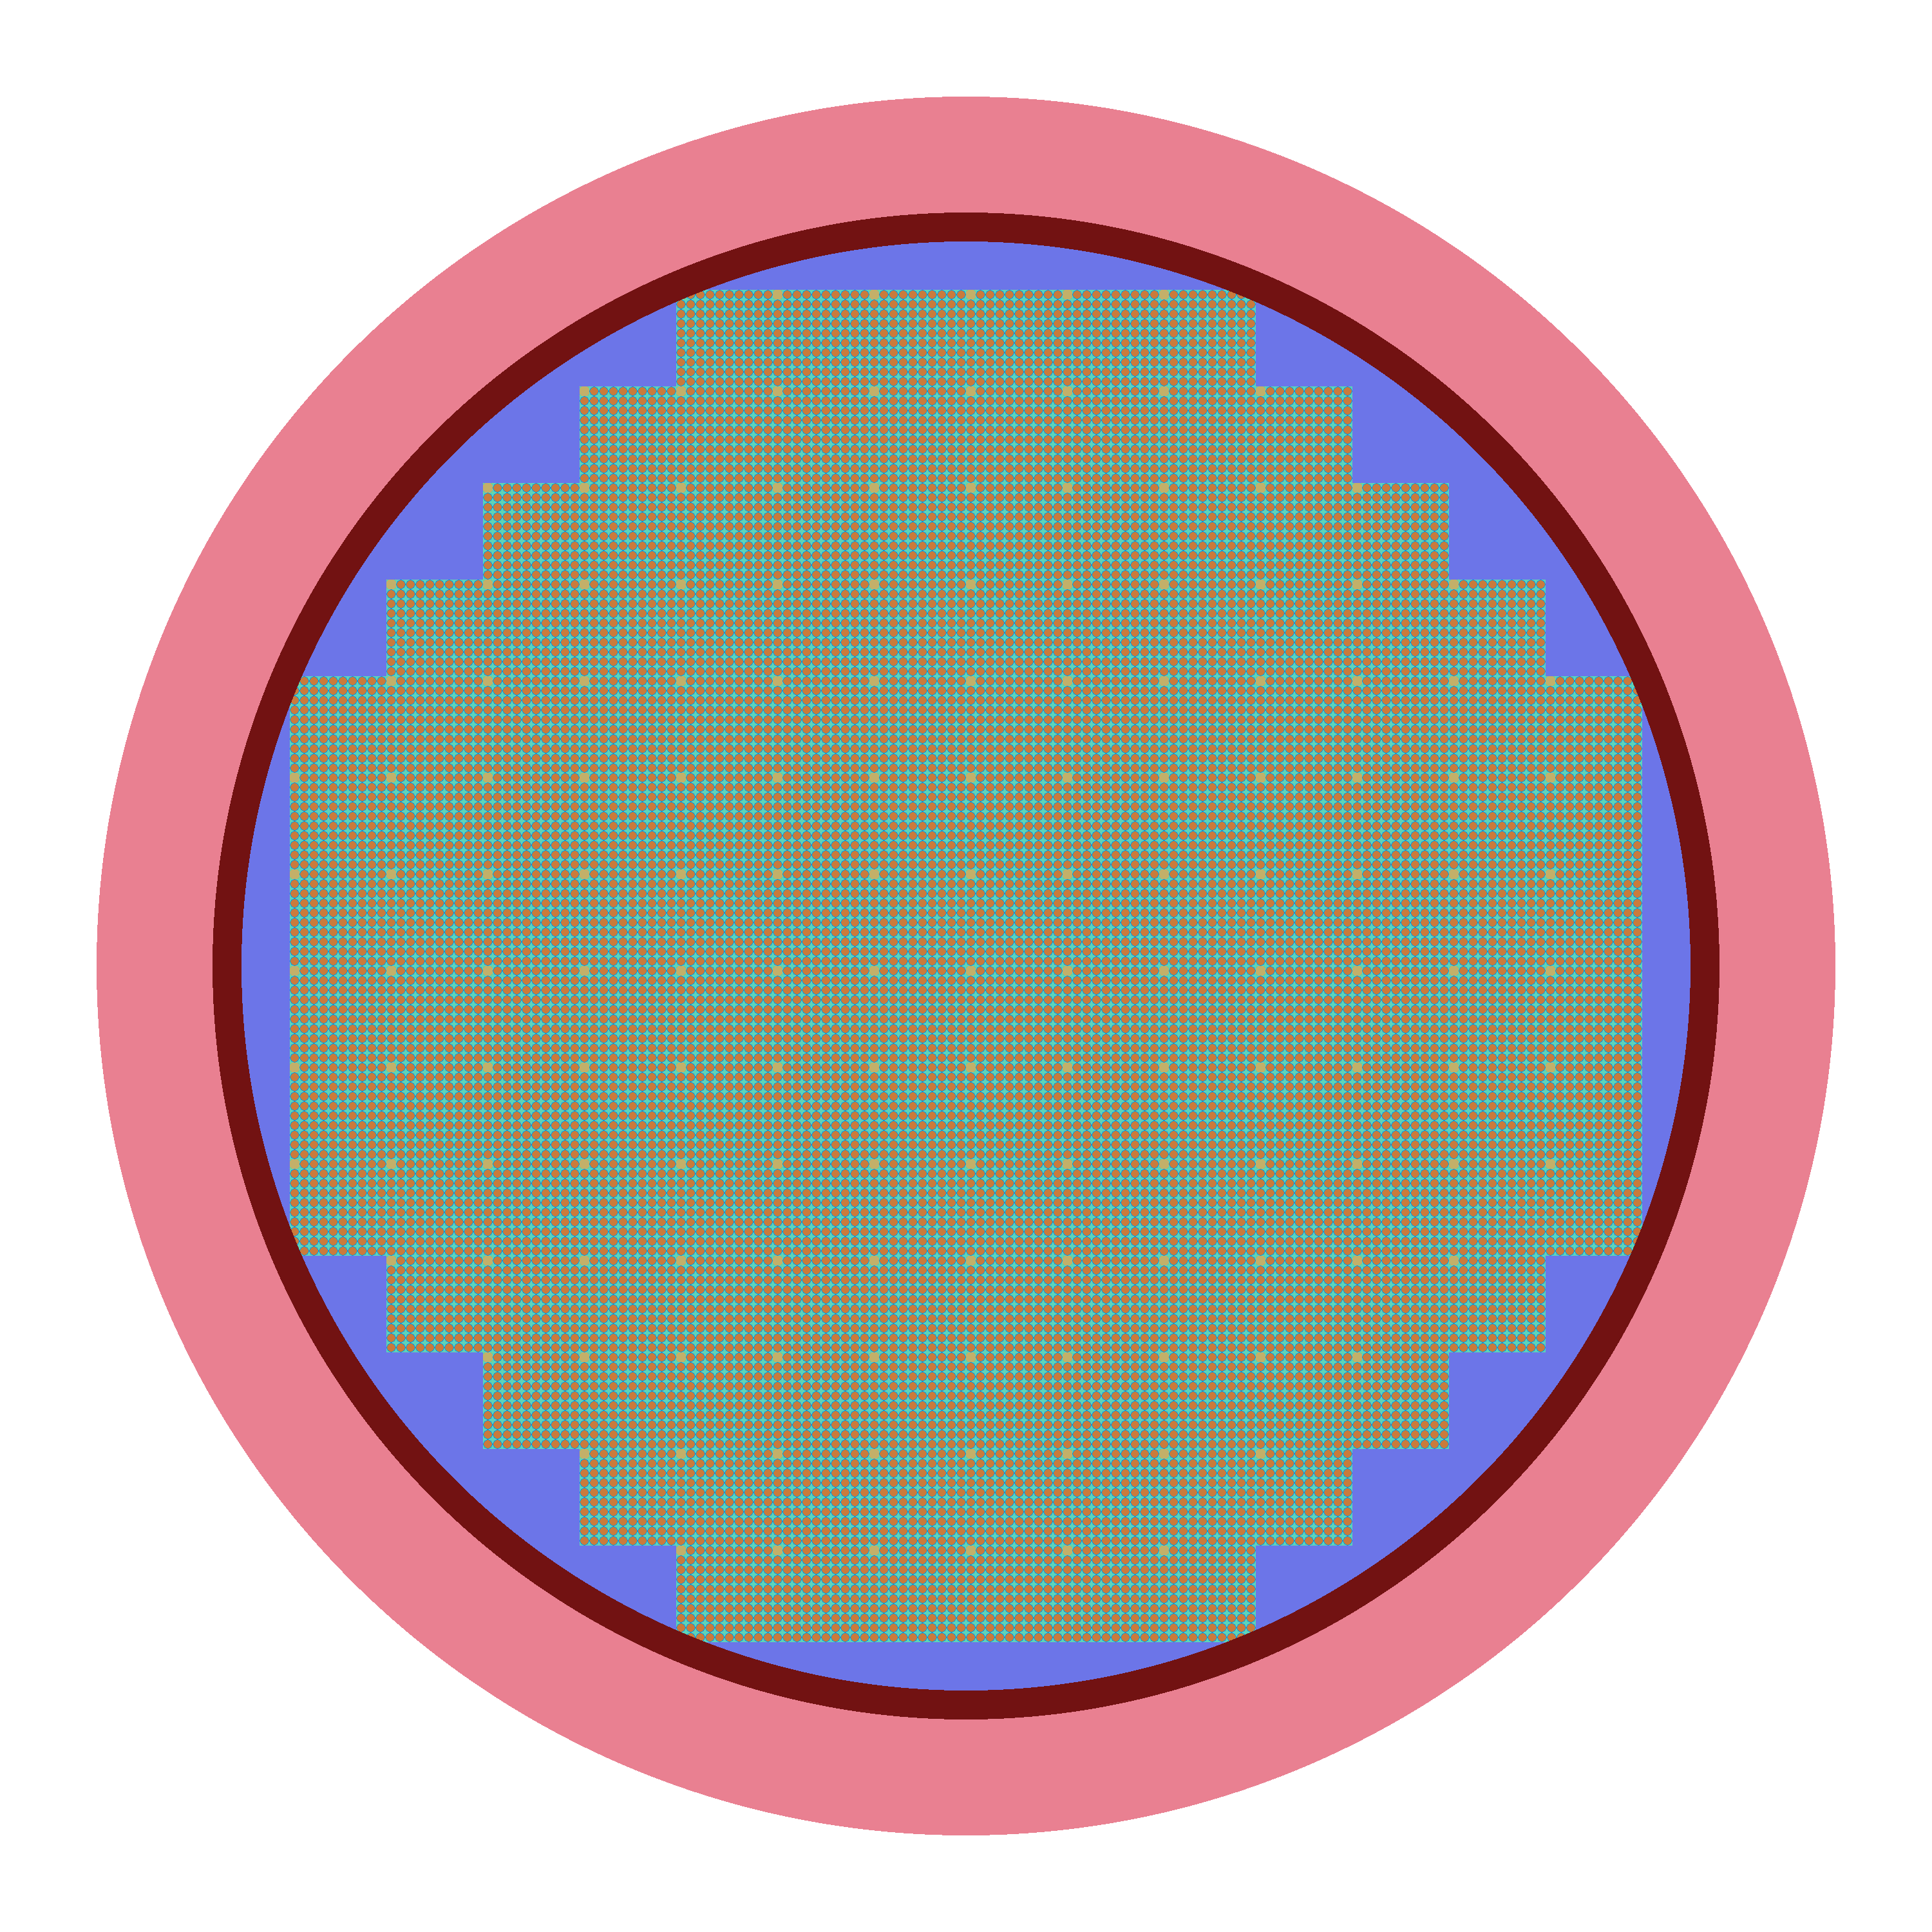

In [10]:
###############################################################################
#                       Make some plots of the geometry
###############################################################################
plot1 = openmc.Plot()
plot1.filename = 'materials-xy'
plot1.origin = [0, 0, 0]
plot1.basis = 'xy'
plot1.width = [200.0, 200.0]
plot1.pixels = [3000, 3000]
plot1.color = "material"

plot2 = openmc.Plot()
plot2.filename = 'materials-xz'
plot2.origin = [0, 0, 0]
plot2.basis = 'xz'
plot2.width = [200.0, 200.0]
plot2.pixels = [1000, 1000]
plot2.color = "material"

plot3 = openmc.Plot()
plot3.filename = 'materials-yz'
plot3.origin = [0, 0, 0]
plot3.basis = 'yz'
plot3.width = [200.0, 200.0]
plot3.pixels = [3000, 3000]
plot3.color = "material"


# Instantiate a Plots collection and export to "plots.xml"
plot_file = openmc.Plots([plot1, plot2, plot3])
plot_file.export_to_xml()

#openmc.plot_geometry()

#plot1.plot_inline()

# Plot inline in jupyter or QtConsole
openmc.plot_inline(plot1)



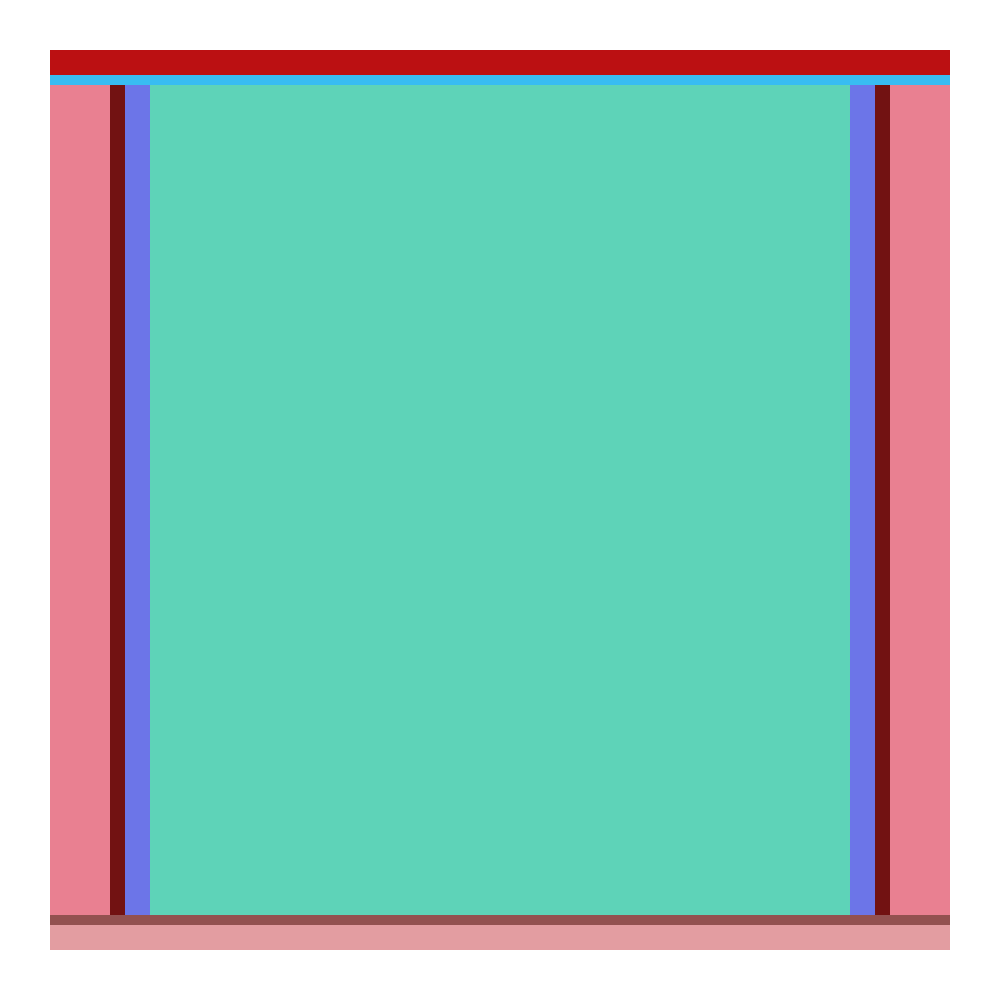

In [11]:
openmc.plot_inline(plot2)

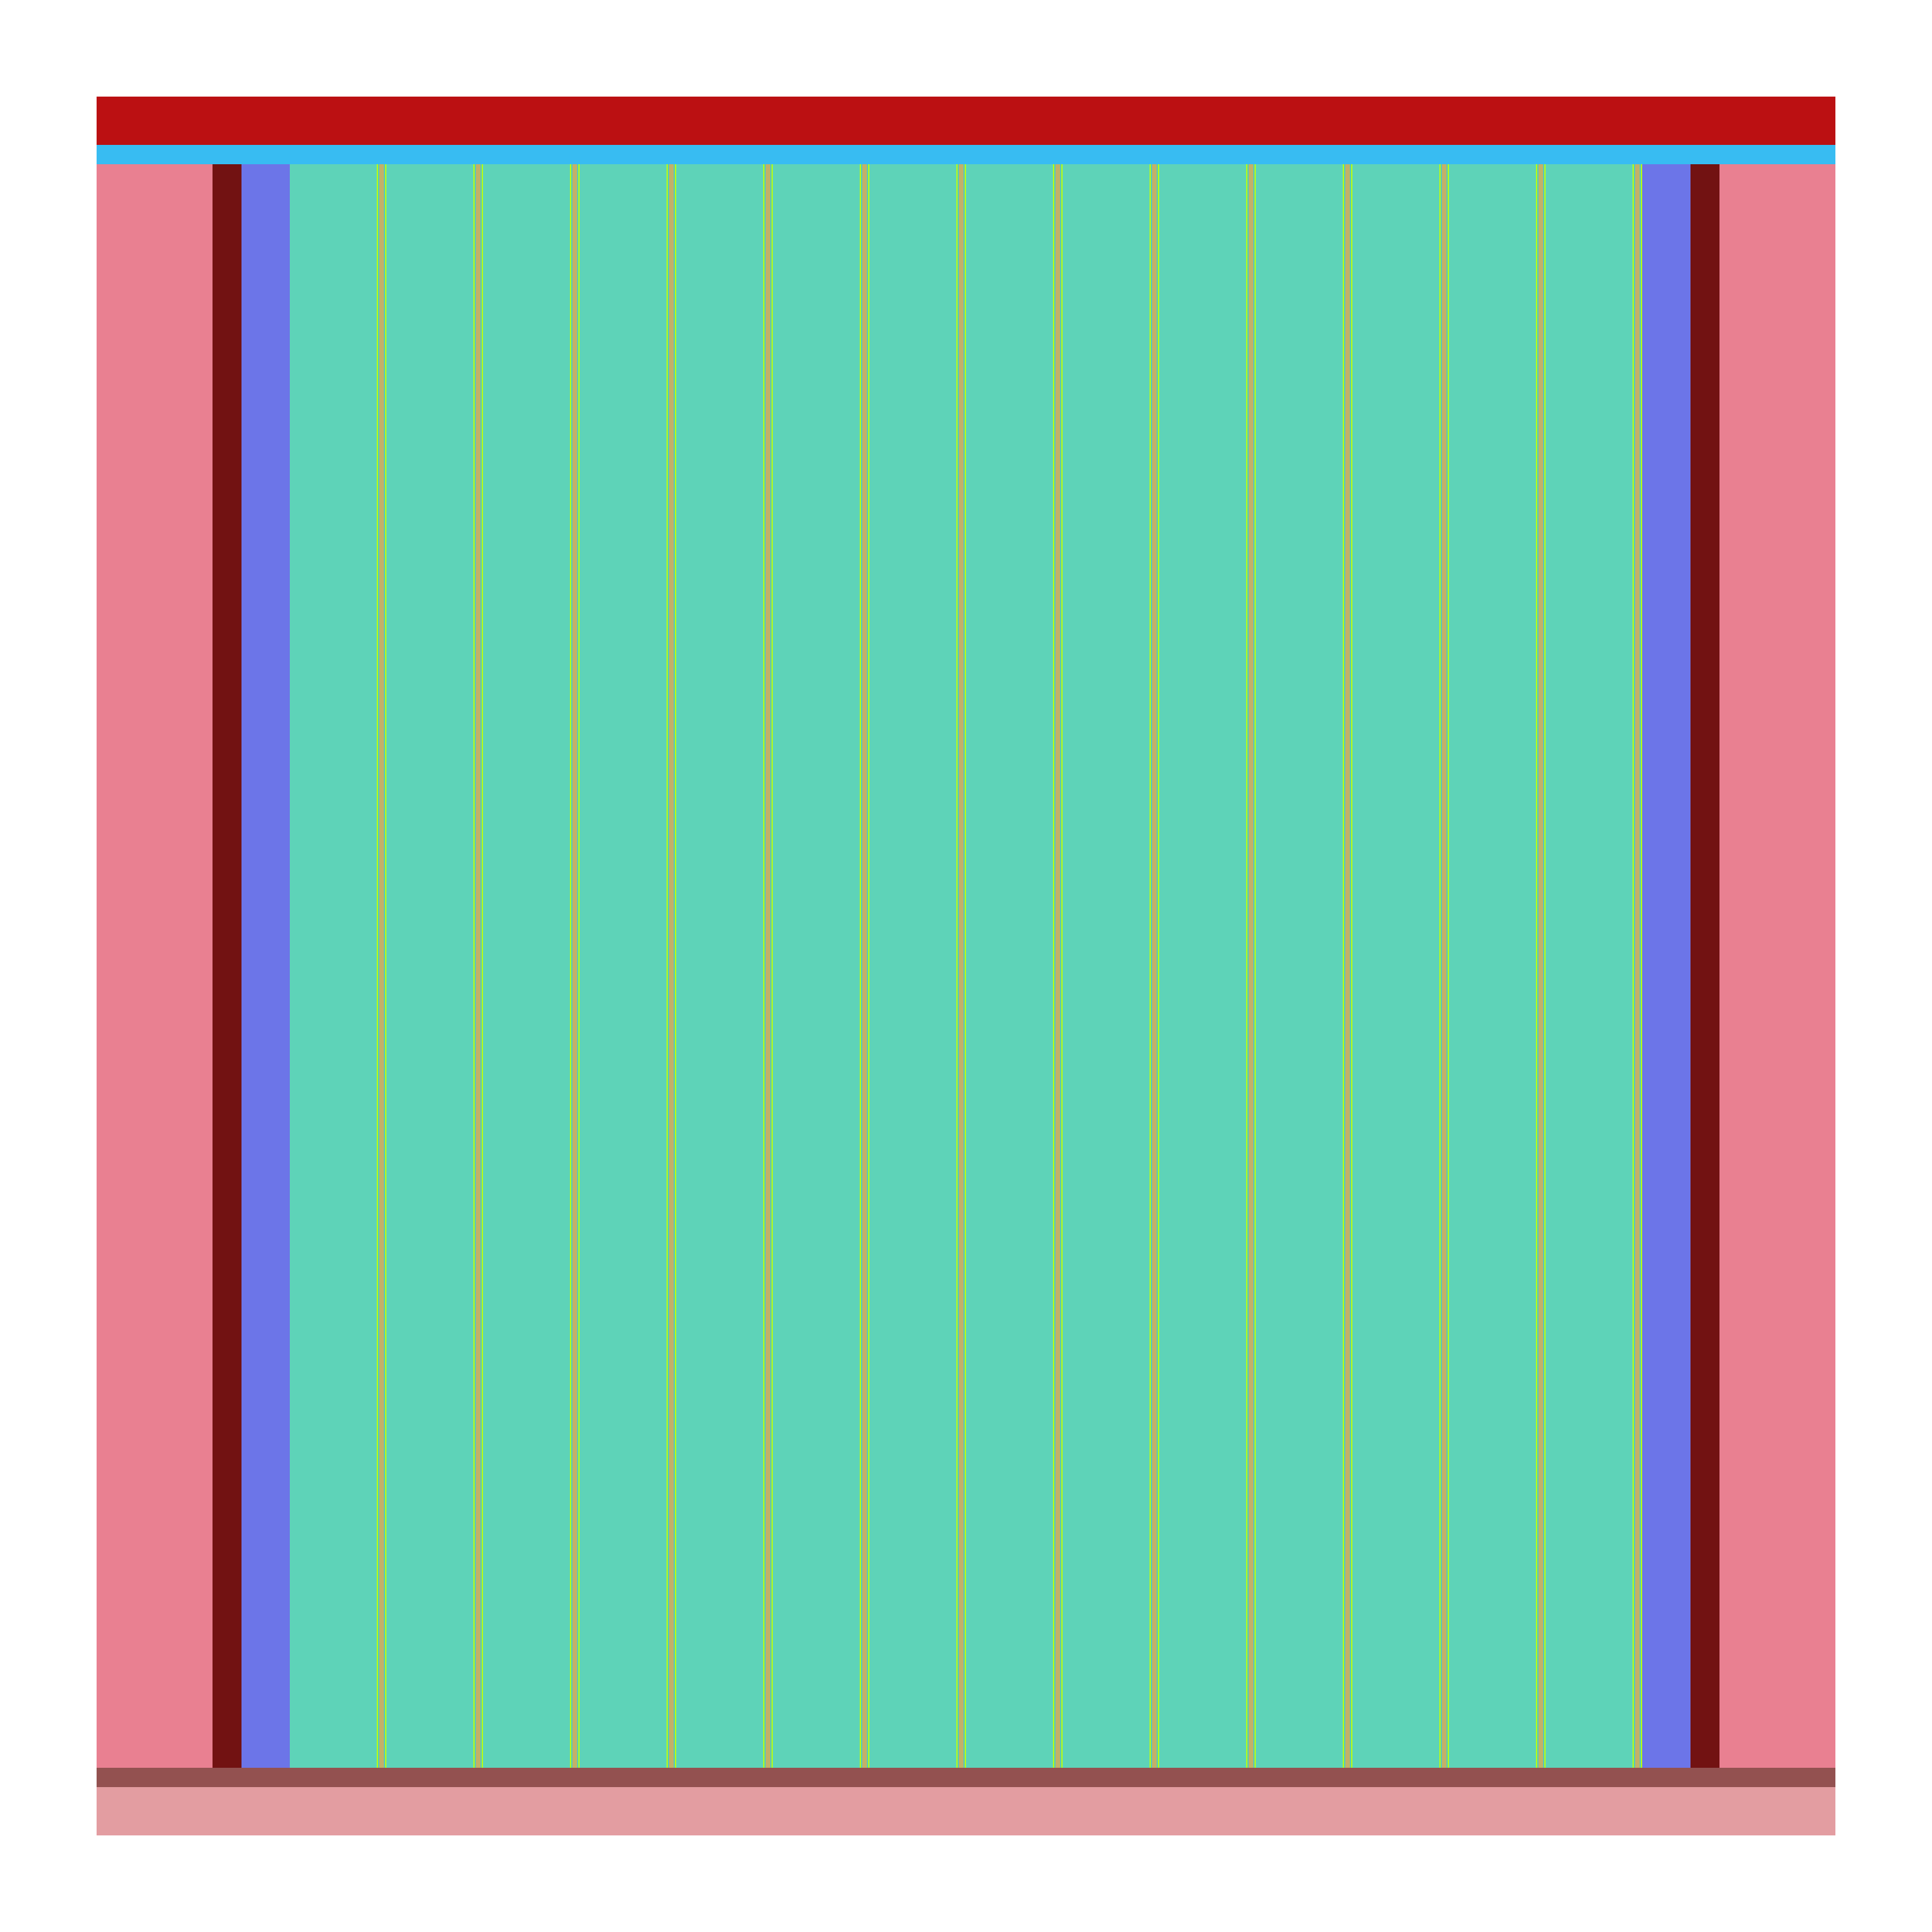

In [12]:
openmc.plot_inline(plot3)

In [ ]:
###############################################################################
#                   Initialize and run depletion calculation
###############################################################################
#openmc.run()
print("Running depletion...")
op = openmc.deplete.Operator(geometry, settings, chain_file)
# Perform simulation using the cecm algorithm
openmc.deplete.integrator.cecm(op, timesteps, power)



Running depletion...
Time to openmc:  26.616551160812378
Time to unpack:  0.003477811813354492
Time to matexp:  0.15406107902526855
Time to openmc:  1.7906851768493652
Time to unpack:  0.0011298656463623047
Time to matexp:  0.1482388973236084
Time to openmc:  1.633929967880249
Time to unpack:  0.0014903545379638672
Time to matexp:  0.1557598114013672
Time to openmc:  1.7537448406219482
Time to unpack:  0.0015950202941894531
Time to matexp:  0.15190887451171875
Time to openmc:  1.6358659267425537
Time to unpack:  0.0019071102142333984
Time to matexp:  0.14794397354125977
Time to openmc:  1.6243462562561035
Time to unpack:  0.0013387203216552734
Time to matexp:  0.15037178993225098
Time to openmc:  1.596099853515625
Time to unpack:  0.0016362667083740234
Time to matexp:  0.15071320533752441
Time to openmc:  1.6151759624481201
Time to unpack:  0.0018389225006103516
Time to matexp:  0.14937782287597656
Time to openmc:  1.6265630722045898
Time to unpack:  0.0014810562133789062
Time to matex